# Postprocessing of Kiss Battery Results

The OpenModelica output is stored as a matlab `.mat` file. It can be accessed via Matlab (of course), Octave, or SciPy.

The [DyMat](http://www.j-raedler.de/projects/DyMat) library is python library that helps accessing OpenModelica Matlab files, and builds upon scipy.

Documentation of DyMat: https://github.com/jraedler/DyMat/blob/master/doc/DyMat-Guide.txt

Install DyMat with `!pip install dymat`

To get a list of all data stored in the results file, run this on the command line:

`!DyMatExport.py -d your_result.mat`

or this:

`DyMatExport.py -l data/kiss1_res.mat > vars.txt`

### Plotting

with plotly.

### Plotting with Matplotlib

https://matplotlib.org/stable/faq/howto_faq.html#how-to-use-matplotlib-in-a-web-application-server

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import DyMat
import re

import sys
sys.path.append("../src/kissmodelica")
import postproc
import plots_plotly as plp
import plots_mpl as plm

## Load Data

In [3]:
# path to result file
#matpath = "../modelica_parametric/_temp/Kiss1_res.mat"
#matpath = "/home/oliver/temp/c05bc2dc-87d9-11eb-9f9e-c75e935792ac/Kiss1_c05bc2dc-87d9-11eb-9f9e-c75e935792ac_res.mat"
matpath = "../data_vdot_novec/modelica_parametric/Kiss18x4_res.mat"
# load it
res = DyMat.DyMatFile(matpath)

## Battery Temperatures


<img src="../doc/nomenclature.png" width="400" align="left">

In [5]:
# get cell temps
df_tcell = postproc.extract_tcell(res)

### Facet Plot

In [6]:
fig = plp.plot_tcell(df_tcell, tmax=1000, step=10, degC=True)
fig.show()

### Min/Max Cell Temperatures

In [7]:
plp.plot_tcell_minmax(df_tcell, tmax=1000, step=10, degC=True)

## Fluid Temperatures

In [8]:
# look at result
df_tfluid = postproc.extract_tfluid(res)
df_tfluid.head()

t      Tfluid  bar  pipe  pos    TfluidC
0  0.0  293.150000    1     0    1  19.990000
1  1.0  293.298655    1     0    1  20.138655
2  2.0  293.515571    1     0    1  20.355571
3  3.0  293.729111    1     0    1  20.569111
4  4.0  293.935522    1     0    1  20.775522

In [9]:
fig = plp.plot_tfluid(df_tfluid, tmax=1200, step=10, degC=True)
fig.show()

## Walls between Pipes

### Wall temperature

In [10]:
# limit to time < 1000 and front side
df_twall = postproc.extract_twall(res)
df_twall.head()

t       Twall  bar  wall     TwallC
0  0.0  293.150000    1     0  19.990000
1  1.0  293.157527    1     0  19.997527
2  2.0  293.197939    1     0  20.037939
3  3.0  293.273381    1     0  20.113381
4  4.0  293.378276    1     0  20.218276

In [11]:
fig = plp.plot_twall(df_twall, tmax=1200, step=10, degC=True)
fig.show()

In [12]:
#fig = plm.plot_twall(df_twall, tmax=1200, step=10, degC=True)

### Wall heat flow

port a: top, port b: bottom ???

In [13]:
# limit to time < 1000 
df_qwall = postproc.extract_qwall(res)
df_qwall.head()

t    Q_flow  bar  wall port
0  0.0  0.000000    1     0    a
1  1.0  0.184708    1     0    a
2  2.0  0.458455    1     0    a
3  3.0  0.675101    1     0    a
4  4.0  0.834687    1     0    a

In [14]:
fig = plp.plot_qwall(df_qwall, tmax=1200, step=10)
fig.show()

In [15]:
#fig = plm.plot_qwall(df_qwall, tmax=1200, step=10)

## Heat flow from battery to fluid

Qpipe is the accumulated heat flow from forward and aft cells (k=0 and k=1)

In [16]:
df_qpipe = postproc.extract_qpipe(res)
df_qpipe.head()

t    Q_flow  i  j
0  0.0  0.000000  1  0
1  1.0 -0.867989  1  0
2  2.0 -1.890611  1  0
3  3.0 -2.888167  1  0
4  4.0 -3.851865  1  0

In [17]:
fig = plp.plot_qpipe(df_qpipe, tmax=1200, step=10)
fig.show()

In [18]:
#fig = plm.plot_qpipe(df_qpipe, tmax=1200, step=10)

## Fluid temperature vs. length

can use same dataframe as above

In [20]:
fig = plp.plot_tfluid_s(df_tfluid, degC=True, pos=2)
fig.show()

In [21]:
#fig = plm.plot_tfluid_s(df_tfluid, degC=True, pos=2)

## Pressure Loss

wir können verschiedene Drücke messen
- pouchCellAndPipe0.pipe3.mediums[1].p
- pouchCellAndPipe0.pipe0.port_a.p
- KuehlmediumTempIn.port_a.p

In [22]:
dfpl = postproc.extract_deltap(res)
fig = plp.plot_deltap(dfpl, step=10, tmax=1200)
fig.show()

In [23]:
#fig = plm.plot_deltap(dfpl, step=10, tmax=1200)

## Energies

### Heat generated in cells

pouchCellAndPipe0.cooledPouchCell0.pouchZelle0.heatFlowSensor_vorHeatCapacitor.port_a.Q_flow

### enthalpy transported by fluid

- pouchCellAndPipe0.pipe0.mediums[1].u
- pouchCellAndPipe0.pipe3.mediums[1].u

In [24]:
df_ener = postproc.extract_energies(res)
df_ener

t  Qdot_gen   Hdot_in   Hdot_out  Qdot_store
0        0.0   484.237  92.12891 -92.128910  484.237000
1        1.0   484.237  92.12891 -93.052705  483.313205
2        2.0   484.237  92.12891 -94.105358  482.260552
3        3.0   484.237  92.12891 -95.240250  481.125660
4        4.0   484.237  92.12891 -96.445095  479.920815
...      ...       ...       ...        ...         ...
1998  1996.0     0.000  92.12891 -92.150230   -0.021319
1999  1997.0     0.000  92.12891 -92.150122   -0.021211
2000  1998.0     0.000  92.12891 -92.150014   -0.021104
2001  1999.0     0.000  92.12891 -92.149908   -0.020997
2002  2000.0     0.000  92.12891 -92.149801   -0.020891

[2003 rows x 5 columns]

In [25]:
#fig_ener = plp.plot_energies(df_ener, tmax=1200, step=10)
#fig_ener.show()

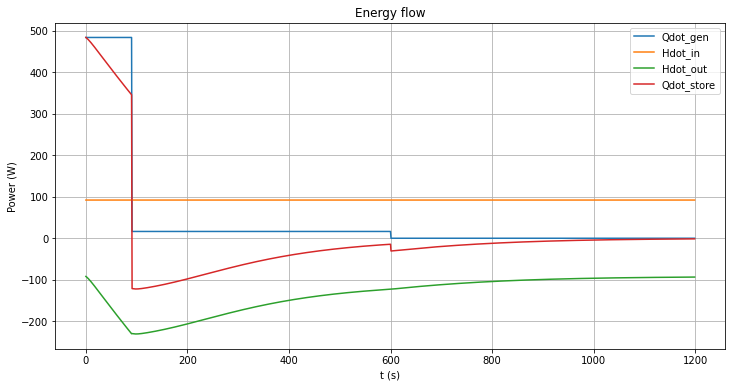

In [26]:
fig = plm.plot_energies(df_ener, tmax=1200, step=1)

In [27]:
# TODO: ähnliche Darstellung, aber aufintegriert (Schichtdiagram)

## Scalar values

- max. heat removal rate
- total length
- channel width
- channel height
- fluid mass


In [28]:
d = postproc.extract_scalar_values(res, channel_width=0.008, twall=0.002,
                                                      channel_height=0.004)
d

unit            symbol  \
simid            N/A               N/A   
C_quartercell    J/K        $C_{cell}$   
nracks             1             $n_r$   
ncells             1             $n_c$   
channel_width      m             $w_c$   
channel_height     m             $h_c$   
twall              m             $t_w$   
channel_dist       m             $d_c$   
area_c            m²             $A_c$   
tend               s         $t_{end}$   
T_inflow           K          $T_{in}$   
mdot_inflow     kg/s    $\dot{m}_{in}$   
Vdot            m³/s    $\dot{V}_{in}$   
v                m/s               $v$   
dp_max            Pa  $\Delta p_{max}$   
Pmax               W         $P_{max}$   
Qgen               J         $Q_{gen}$   
T_cellmax          K    $T_{cell,max}$   
t21                s          $t_{21}$   
tpeak              s        $t_{peak}$   
T_cell1000         K  $T_{cell,1000s}$   
dhyd               m         $d_{hyd}$   
Re                 1              $Re$   

                                                      description  \
simid                                         simulation model id   
C_quartercell                     Heat capacity of a quarter cell   
nracks                  number of racks/modules in a battery pack   
ncells                                   number of cells per rack   
channel_width                               cooling channel width   
channel_height                             cooling channel height   
twall                              cooling channel wall thickness   
channel_dist                    distance between cooling channels   
area_c                        Cross section area of fluid channel   
tend                                      Maximum simulation time   
T_inflow                          Temparature of medium at inflow   
mdot_inflow           Mass flow rate of cooling fluid in one rack   
Vdot            Volume flow rate of cooling fluid at inflow in...   
v                                        fluid velocity at inflow   
dp_max          Maximum pressure loss (over time) between outf...   
Pmax            Maximum (over time) pump power required to pus...   
Qgen            Heat generated by battery cells during dischar...   
T_cellmax       Maximum cell temperature (over all cells, all ...   
t21             Time until temperature of last cell has cooled...   
tpeak                            Time of maximum cell temperature   
T_cell1000               Temperature of hottest cell after 1000 s   
dhyd                          Hydraulic diameter of fluid channel   
Re              Reynolds number of fluid flow at inflow, based...   

                       value  
simid                    NaN  
C_quartercell            NaN  
nracks                   NaN  
ncells                   NaN  
channel_width       0.008000  
channel_height      0.004000  
twall               0.002000  
channel_dist             NaN  
area_c              0.000032  
tend             2000.000000  
T_inflow          293.150000  
mdot_inflow         0.003700  
Vdot                0.000004  
v                   0.115834  
dp_max          22598.255156  
Pmax                0.083764  
Qgen            52924.869160  
T_cellmax         324.472556  
t21              1016.000000  
tpeak              90.000000  
T_cell1000        294.236618  
dhyd                0.010667  
Re               1230.871590